In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
data_path = f"../data/zomato_processed.csv"
df_original = pd.read_csv(data_path)
df = df_original.copy()

## Functions

In [7]:
def filter_best(df, cols, group):

    df_aux = df.sort_values(by='aggregate_rating', ascending=False).groupby(group).first().reset_index()

    # Exibir informações desejadas: nome do restaurante, país, tipo de culinária e a nota
    cols_to_show = cols
    df = df_aux[cols_to_show]
    
    return df

In [26]:
def cuisines_bar_plot(df, cols, x, y, operacao, ascending = False, title='Título', xaxis_title='Eixo X', yaxis_title='Eixo Y', legend_title_text = 'Legenda'):
    # Seleciona as colunas especificadas
    df_aux = df.loc[:, cols]
    
    # Aplica a operação especificada
    df_aux = df_aux.groupby(x)[y].agg(operacao).reset_index()

    # Ordena o DataFrame com base no y
    df_aux = df_aux.sort_values(by = y, ascending = ascending).reset_index(drop=True)

    # Seleciona os 10 primeiros números
    df_aux = df_aux.head(10)
    
    # Gráfico
    fig = px.bar(df_aux, 
                 x = x, 
                 y = y,
                 color = x, 
                 title = title,
                 text = y) # adiciona o valor nas barras
    
    # Renomeia eixos e legenda
    fig.update_layout(xaxis_title = xaxis_title,  # renomeia o eixo x
                      yaxis_title = yaxis_title,  # renomeia o eixo y
                      legend_title_text = legend_title_text,  # título da legenda
                      template = 'plotly_dark',  # altera o tema
                      font = dict(size=12),  # altera o tamanho da fonte
                      title_x = 0.5,  # centraliza o título
                      height = 600,  # define a altura do gráfico
                      width = 1300)   # define a largura do gráfico
    
    # Atualiza as anotações para exibir os valores nas barras
    fig.update_traces(
        texttemplate='%{text:.1f}', 
        textposition='outside',  # exibir o valor fora da barra
        textfont_size=10  # tamanho da fonte dos valores
    )
    
    # Plota o Gráfico
    return fig.show()

## Apply Functions

In [8]:
# Melhores restaurantes por país
df = df
cols = ['country_name', 'restaurant_name', 'cuisines', 'aggregate_rating']
group = 'country_name'

best_rest_for_country = filter_best(df, cols, group)
best_rest_for_country

,country_name,restaurant_name,cuisines,aggregate_rating
0,Australia,Mandoo Korean Dumplings,Korean,4.9
1,Brazil,Churrascaria Palace,Steak,4.9
2,Canada,Jimmy's A&A Mediterranean Deli,Mediterranean,4.9
3,England,Chin Chin Labs,Ice Cream,4.9
4,India,Pabbas,Ice Cream,4.9
5,Indonesia,Sushi Masa,Sushi,4.9
6,New Zealand,Duck Island Ice Cream,Ice Cream,4.9
7,Philippines,Silantro Fil-Mex,Filipino,4.9
8,Qatar,The Cheesecake Factory,American,4.9
9,Singapore,Ronin Cafe,Cafe,4.9


In [10]:
# Melhor restaurante da culinária
df = df
cols = ['cuisines', 'restaurant_name', 'country_name', 'aggregate_rating']
group = 'cuisines'

best_rest_for_cuisine = filter_best(df, cols, group)
best_rest_for_cuisine

,cuisines,restaurant_name,country_name,aggregate_rating
0,Afghan,Khan Baba,India,4.1
1,African,Kream,South Africa,4.8
2,American,"Tocabe, An American Indian Eatery",United States of America,4.9
3,Andhra,Gourmet Nine,India,4.7
4,Arabian,Mandi@36,India,4.7
...,...,...,...,...
160,Vegetarian,Lola Rosa Cafe,Canada,4.7
161,Vietnamese,Vietnam House Restaurant & Gallery,England,4.9
162,Western,The Garden,Indonesia,4.6
163,World Cuisine,Gaga Manjero,Turkey,4.9


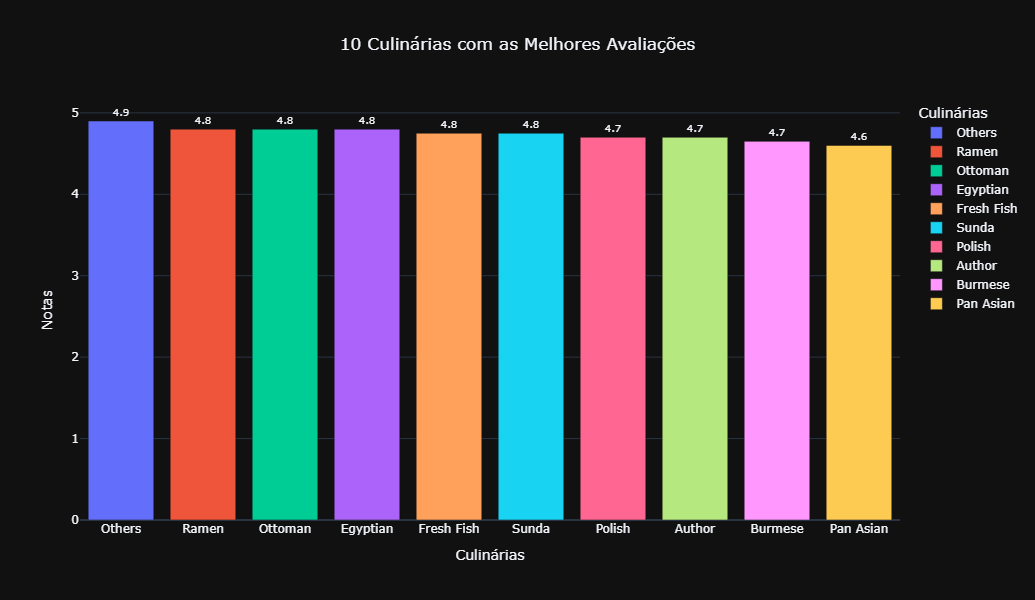

In [27]:
# 10 Culinárias com as Melhores Avaliações
cols = ['cuisines', 'aggregate_rating']
df = df_original.copy()
x = 'cuisines'
y = 'aggregate_rating'
operacao = 'mean'  # Alteração aqui para usar a string 'mean'
title = '10 Culinárias com as Melhores Avaliações'
xaxis_title = 'Culinárias'
yaxis_title = 'Notas'
legend_title_text = 'Culinárias'

cuisines_best10 = cuisines_bar_plot(df, cols, x, y, operacao, ascending = False, title = title, xaxis_title = xaxis_title, yaxis_title = yaxis_title, legend_title_text = legend_title_text)
cuisines_best10

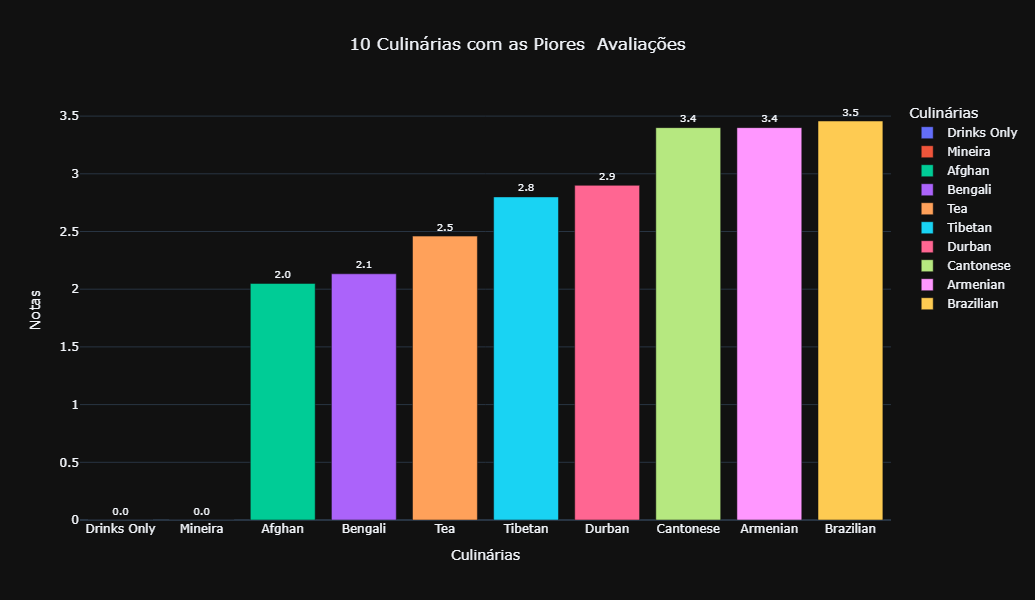

In [29]:
# 10 Culinárias com as Piores Avaliações
cols = ['cuisines', 'aggregate_rating']
df = df_original.copy()
x = 'cuisines'
y = 'aggregate_rating'
operacao = 'mean'  # Alteração aqui para usar a string 'mean'
title = '10 Culinárias com as Piores  Avaliações'
xaxis_title = 'Culinárias'
yaxis_title = 'Notas'
legend_title_text = 'Culinárias'

cuisines_worst = cuisines_bar_plot(df, cols, x, y, operacao, ascending = True, title = title, xaxis_title = xaxis_title, yaxis_title = yaxis_title, legend_title_text = legend_title_text)
cuisines_worst